# Limpieza dataset

In [1]:
import pandas as pd

In [2]:
ruta='../data/datos_pisos.csv'
sep=';'
df = pd.read_csv(ruta,sep=sep)

df.drop('Unnamed: 0', inplace=True, axis=1)
df=df[['uv', 'estado_x', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia', 'ciudad', 'distrito', 'planta','habitaciones', 'banos', 'metros', 'fecha_construccion', 'orientacion', 'situacion', 'portal', 'ascensor', 'parque_infantil','terraza', 'trastero', 'piscina_comunitaria', 'cuarto_de_basura','zonas_comunes', 'piscina', 'garaje', 'tejado', 'calefaccion', 'jardin', 'aire_acondicionado', 'cusec']]
df.piscina = ((df.piscina + df.piscina_comunitaria)>0).astype(int) # para las piscinas no marcadas como comunitarias las juntamos
df=df.drop('piscina_comunitaria', axis=1)
df.columns

Index(['uv', 'estado_x', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'orientacion', 'situacion', 'portal', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'cuarto_de_basura',
       'zonas_comunes', 'piscina', 'garaje', 'tejado', 'calefaccion', 'jardin',
       'aire_acondicionado', 'cusec'],
      dtype='object')

Eliminamos las oficinas y locales ya que responden a otros criterios.

In [3]:

df = df[df.tipo_vivienda != 'Oficina']
df = df[df.tipo_vivienda != 'Local']

La información de "barrio" del data set es pobre para nuestros propósitos: desechamos la información.


<AxesSubplot:ylabel='Frequency'>

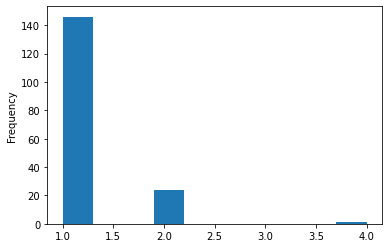

In [4]:
df.uv.value_counts().plot.hist()


In [5]:
df

,uv,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,...,trastero,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
0,UV/2020/000003,01,Piso,160000,40.4278,-3.63083,1,Madrid,San Blas,9,...,0,0,0,0,0,0,0,0,0,2.807915e+09
1,UV/2020/000004,01,Piso,125000,40.1924,-3.66922,1,Valdemoro,Zona estación,1,...,1,0,0,0,0,0,0,0,0,2.816101e+09
2,UV/2020/000006,01,Piso,0,40.4330,-3.63715,1,Madrid,Ciudad Lineal,2,...,0,0,0,0,0,0,0,0,0,2.807915e+09
3,UV/2020/000007,01,Piso,159000,40.2950,-3.80339,1,Fuenlabrada,La Serna,9,...,0,0,0,0,0,0,0,0,0,2.805806e+09
4,UV/2020/000008,01,Piso,170000,40.2846,-3.78862,1,Fuenlabrada,Centro,6,...,0,0,0,1,0,0,0,0,0,2.805802e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,UV/2021/000430,02,Piso,239000,41.3745,2.12767,2,Barcelona,Sants-Montjuïc,2,...,0,0,0,0,0,0,0,0,0,8.019031e+08
200,UV/2021/000430,02,Piso,239000,41.3745,2.12767,2,Barcelona,Sants-Montjuïc,2,...,0,0,0,0,0,0,0,0,0,8.019031e+08
201,UV/2021/000433,01,Piso,300000,41.3809,2.17924,2,Barcelona,Ciutat Vella,0,...,1,0,0,0,0,0,0,0,0,8.019010e+08
202,UV/2021/000441,01,Piso,237000,41.3819,2.14522,2,Barcelona,L' Eixample,3,...,0,0,0,0,0,0,0,0,0,8.019021e+08


La mayoría de inmuebles tiene un identificador único pero uno 20 inmuebles tiene identificador duplicado. Eso oimplica que tendremos que limpiar el dataset con la info que necesitamos.

In [6]:
agrupados = df.groupby('uv').count()['estado_x']
lista_duplicados = agrupados[agrupados>1]
lista_duplicados

uv
UV/2020/000011    2
UV/2020/000071    2
UV/2020/000086    2
UV/2020/000253    2
UV/2020/000303    2
UV/2020/000305    2
UV/2020/000306    2
UV/2020/000307    2
UV/2020/000309    2
UV/2020/000310    4
UV/2020/000322    2
UV/2020/000323    2
UV/2020/000324    2
UV/2020/000327    2
UV/2020/000330    2
UV/2021/000338    2
UV/2021/000345    2
UV/2021/000348    2
UV/2021/000376    2
UV/2021/000389    2
UV/2021/000397    2
UV/2021/000405    2
UV/2021/000417    2
UV/2021/000430    2
UV/2021/000456    2
Name: estado_x, dtype: int64

In [7]:
df[df['uv']== 'UV/2020/000310']

,uv,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,...,trastero,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
94,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
95,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
96,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
97,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09


Vemos que hay alguno re-duplicado

In [8]:
df[df['uv']== 'UV/2020/000310']

,uv,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,...,trastero,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
94,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
95,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
96,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
97,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09


Estos son los inmuebles repetidos en nuestro DF

veamos cómo son los pisos duplicados

veamos qué variables vienen con datos ianconsistentes entre los pisos con mismo identificador pero estado diferente

In [9]:
(df.groupby('uv').nunique()>1).sum()

estado_x               1
tipo_vivienda          0
precio                 1
long                   0
lat                    0
provincia              0
ciudad                 0
distrito               0
planta                 0
habitaciones           8
banos                  9
metros                 0
fecha_construccion     0
orientacion            0
situacion              0
portal                10
ascensor               3
parque_infantil        0
terraza                5
trastero               1
cuarto_de_basura       0
zonas_comunes          1
piscina                0
garaje                 1
tejado                 0
calefaccion            1
jardin                 0
aire_acondicionado     0
cusec                  0
dtype: int64

Solo hay uno que los precios son diferentes al agrupar por uv

In [10]:
precio_distintos_uv_igual=df.groupby('uv').nunique()['precio']>1
precio_distintos_uv_igual[precio_distintos_uv_igual]

uv
UV/2020/000310    True
Name: precio, dtype: bool

In [11]:
df[df.uv=='UV/2020/000310']

,uv,estado_x,tipo_vivienda,precio,long,lat,provincia,ciudad,distrito,planta,...,trastero,cuarto_de_basura,zonas_comunes,piscina,garaje,tejado,calefaccion,jardin,aire_acondicionado,cusec
94,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
95,UV/2020/000310,01,Piso,209000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
96,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09
97,UV/2020/000310,02,Piso,250000,40.4348,-3.67275,1,Madrid,Salamanca,5,...,0,0,0,0,0,0,0,0,0,2.807904e+09


Vemmos que surge la idea de el problema surge que el precio ha variado al reformarlo y estáa duplicado. Nos cargamos los tres primeros


In [12]:
df = df.drop([df.index[94], df.index[95], df.index[96]])
  

In [13]:
df_campos_diferentes = df.groupby('uv').agg('nunique')
df_campos_diferentes.dropna(axis=0, how='all',inplace=True)

In [14]:
df=df.groupby('uv').last()


In [15]:
ruta='../data/precio_sscc_scrapping.csv'
sep='|'
precio = pd.read_csv(ruta,sep=sep)

In [16]:
dict_m2_area = precio.set_index('cusec')['price'].to_dict()

In [17]:
df['precio_area']=df.cusec.map(dict_m2_area)


In [18]:
df.precio_area.isna().sum()

27

Tenemos 29 áreas de las que no sabemos su precio.

In [19]:
df=df.drop(['UV/2021/000345'])

In [20]:
df.precio=df.precio/1000

In [21]:
df.precio

uv
UV/2020/000003    160.0
UV/2020/000004    125.0
UV/2020/000006      0.0
UV/2020/000007    159.0
UV/2020/000008    170.0
                  ...  
UV/2021/000444    120.0
UV/2021/000448    130.0
UV/2021/000451     99.9
UV/2021/000456      1.0
UV/2021/000461     75.0
Name: precio, Length: 170, dtype: float64

# Exploracion para estracción de rasgos

In [22]:
df.columns =['estado', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'orientacion', 'situacion', 'portal', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'cuarto_de_basura',
       'zonas_comunes', 'piscina', 'garaje', 'tejado', 'calefaccion', 'jardin',
       'aire_acondicionado', 'cusec', 'precio_area']

In [23]:
df.estado.value_counts()

01    148
02     22
Name: estado, dtype: int64

# Precio estimando la reforma

El estado es 1= sin reformar y 2=reformado

En caso de que el cliente tenga pensado la opciónd e que una reforma fuera una opción. Podríamos obterne  una estimación de cuanto sería el precio ya reformado.

https://housfy.com/blog/cual-es-el-precio-de-las-reformas-integrales-descubrelo/#:~:text=Para%20hacernos%20una%20idea%20aproximada,acondicionado%20por%20conductos%2C%20entre%20otros.

Seguro que clickalia tiene este dato pero podemos utilizar esta tabla como estimación para nuestro proyecto:

Tipo de pisos (reforma integral)	Precio desde:	Saber más
-Reforma integral de un piso de 50 a 60 m2	25.000€

-Reforma integral de un piso de 70 a 80m2	35.000€	

-Reforma integral de un piso de 80 a 90 m2	45.000€	

-Reforma integral de un piso de 100 a 120 m2	55.000€	Solicitar presupuesto gratis

-Reforma integral de un piso de 120 m2 a 200m2	80.000€	Solicitar presupuesto gratis

-Reforma integral de un piso de más de 200m2	120.000€

Es una estimación burda pero nos podría venir bien para el modelo.

Así el estado, la superficio y esta tabla podríamos estimar el precio  de la reforma necesaria.

Así podríamos ofrecer al cliente pisos sin reformar aunque pos solicitara un piso reformado.

# Planta y ascensor

Podemos tener en cuenta esta combinación de características. Así podemos entender que si alguien se ha interesado por una planta alta sin ascensor, a lo mejor podría interesarse por una planta 2 sin ascensor al mismo precio. Esto permitiría ajustes de precios y podría ser útil en determinados perfiles a lo mejor más jóvenes, dándoles opciones más ajustadas pero útiles

Podríamos generar una variable que fuese movilidad_vertical. Sería máxima para pisos con ascensro, alta para una planta 1 (tenga o no ascensor) y media para una planta 2 sin ascensor y muy baja o nula para plantas superiores sin ascensor. 

Los pisos bajos los catergorizaremos aparte para casi todo.

Esto lo podemos ver en las distancias.


In [24]:
def estimador_reforma(metros):
    if metros < 80: return 35
    elif metros < 90: return 45
    elif metros < 120: return 55
    elif metros < 200: return 80
    else: return 120

In [25]:
df['reforma']=df.metros.apply(estimador_reforma)
df.reforma[df.estado==2]=0



ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [26]:
df['precio_reformado']=df.precio + df.reforma
df[df.precio==0]['precio']=None


ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
df[['estado','precio','reforma','precio_reformado']]    


,estado,precio,reforma,precio_reformado
uv,,,,
UV/2020/000003,01,160.0,35,195.0
UV/2020/000004,01,125.0,35,160.0
UV/2020/000006,01,0.0,35,35.0
UV/2020/000007,01,159.0,35,194.0
UV/2020/000008,01,170.0,45,215.0
...,...,...,...,...
UV/2021/000444,01,120.0,35,155.0
UV/2021/000448,01,130.0,35,165.0
UV/2021/000451,01,99.9,35,134.9


# Area: barrio parecido

Podemos estimar el area censal como barrio ya que la info que tenmos de "barrio" es pobre.

Consideraremos tb que barrios parecido deberían tener un precio_area parecido.

In [28]:
df.columns

Index(['estado', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'orientacion', 'situacion', 'portal', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'cuarto_de_basura',
       'zonas_comunes', 'piscina', 'garaje', 'tejado', 'calefaccion', 'jardin',
       'aire_acondicionado', 'cusec', 'precio_area', 'reforma',
       'precio_reformado'],
      dtype='object')

In [29]:
def ns(df):
    def es_NS(cadena):
        try:
            CADENA = cadena.upper()
            if 'N' in CADENA: return 'N'
            elif 'S' in CADENA: return 'S'
            else: return ''
        except:
            return ''
    df['ns'] = df.orientacion.apply(es_NS)
    return df
    

# Metros

La variable metros sí que podemos entenderar en función de la diferencia.

# Baños 

Ocurriría algo parecido.

# Fecha de construcción

Parece que en este caso está claro que tb podríamos establecer una métrica directa


# Habitaciones

¿Cómo ponderamos la distantacia entre habitaciones? Evidentemente si tenemos cierto margen al número ode habitaciones podríamos pensar que sería un filtro con un margen? ¿Podríamos pensar que una persona aceptaría una casa con diferente número ode habiataciones? Si así fuera analicemos qué podríamos paremetrizar.

Podríamos entender que nadie que busca una casa de "n" habitaciones va a aceptar una casa con "n+/2 habitaciones", así que podemos entender que a nuestra búsqueda exacta del número de habitaciones podríamos ampliarla con, por ejemplo, +-1 habitación siempre que cumpla todos los requisitos completo y ponderado por su peso. Me explico:

Pensemos en una persona joven que ha llegado interesado por un piso de 1hab. O un estudio de 0 habi. Si tiene cierta capacidad de movimiento podríamos ofrecerle un piso de 2 o de 1 hab en otro ositio. A lo mejor un bajo en vez de un primero. 

De esta manera podemoso pensar en ampliar la búsqueda solo a +-1 habitación

# Orientación

Determinaremos dos métricas de aquí NS y EO ya que la primera es más tajante que la segunda.

In [30]:
def eo(df):
    def es_EO(cadena):
        try:
            CADENA = cadena.upper()
            if 'E' in CADENA: return 'E'
            elif 'O' in CADENA: return 'O'
            else: return ''
        except:
            return ''

    df['eo'] = df.orientacion.apply(es_EO)
    return df

# INT EXT PATIO

en este caso podemos entender una relación gradual entre ellos. 

Así asignaremos Interior=0, PatioManzana=1 y exterior=2
Entendemos que si tienen una relación ordinal pues patio de manzana estaría équidistante de ambos y la diferencia aritméti si tendría cierto sentido.

In [31]:
df=ns(df)

In [32]:
df=eo(df)

In [33]:
df.drop(['orientacion'], axis=1,inplace=True)

In [34]:
df.columns

Index(['estado', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'situacion', 'portal', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'cuarto_de_basura',
       'zonas_comunes', 'piscina', 'garaje', 'tejado', 'calefaccion', 'jardin',
       'aire_acondicionado', 'cusec', 'precio_area', 'reforma',
       'precio_reformado', 'ns', 'eo'],
      dtype='object')

In [35]:
df.columns = ['estado', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'intext', 'portal', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'cuarto_de_basura',
       'zonas_comunes', 'piscina', 'garaje', 'tejado', 'calefaccion', 'jardin',
       'aire_acondicionado', 'cusec', 'precio_area', 'reforma',
       'precio_reformado', 'ns', 'eo']

In [36]:
conversor_intext={'Exterior':3,'Patio de manzana':2,'Interior':1}

In [37]:
df.intext=df.intext.map(conversor_intext)

In [38]:
df.intext.value_counts()

3    140
1     27
2      3
Name: intext, dtype: int64

# Portal La variable "portal" vamos a cambiarla por "potero" que tiene más sentido

In [39]:
df.columns =['estado', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'intext', 'portero', 'ascensor', 'parque_infantil',
       'terraza', 'trastero', 'cuarto_de_basura', 'zonas_comunes', 'piscina',
       'garaje', 'tejado', 'calefaccion', 'jardin', 'aire_acondicionado',
       'cusec', 'precio_area', 'reforma', 'precio_reformado', 'ns', 'eo']

In [40]:
df.columns

Index(['estado', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'intext', 'portero', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'cuarto_de_basura',
       'zonas_comunes', 'piscina', 'garaje', 'tejado', 'calefaccion', 'jardin',
       'aire_acondicionado', 'cusec', 'precio_area', 'reforma',
       'precio_reformado', 'ns', 'eo'],
      dtype='object')

In [41]:
df=df.drop('tejado',axis=1)

Index(['estado', 'tipo_vivienda', 'precio', 'long', 'lat', 'provincia',
       'ciudad', 'distrito', 'planta', 'habitaciones', 'banos', 'metros',
       'fecha_construccion', 'intext', 'portero', 'ascensor',
       'parque_infantil', 'terraza', 'trastero', 'cuarto_de_basura',
       'zonas_comunes', 'piscina', 'garaje', 'calefaccion', 'jardin',
       'aire_acondicionado', 'cusec', 'precio_area', 'reforma',
       'precio_reformado', 'ns', 'eo'],
      dtype='object')

# DISTANCIA ESTADO

¿Cómo calcular la distancia respecto al estado entre dos pisos?

Al ser categórica sería tan simple como igual/dierente. Pero podríamos plantearnos no incluir esta medida de deistancia y preguntarnos:

Supongamos que ha acercado un inmueble sin reformar. por 100 euros. Le freceríamos todos los inmuebles cumplan esta característica y ponderaríamos la distancia entre ambos por el peso 1-5 correspondiente.

Si estimamos que ese piso tiene una reforma de 50 podríamos preguntarle ¿cómo ponderarías un piso ya reformado por 150?

Así, tendríamos que otorgar dos pesos:

 1. al precio de la categoría propia
 2. a los pesos de la categoría contraría 

 Así puede que si ha elegido un piso sin reformarpuede que le de much le de mucho valor (pongamos un 5) a que se ajuste al precio y a un piso ya reformado le de un peso de 2 porque está dispuesto a ver pisos ya reformados pero el cliente valora hacerlo.


In [42]:
df.tipo_vivienda.value_counts()

Piso      167
Casa        1
Bajo        1
Dúplex      1
Name: tipo_vivienda, dtype: int64

como vemos hay tan pocos valores que no mere ni hacerle una categoría propia así que la eliminamos.

In [43]:
df=df.drop('tipo_vivienda', axis=1)

In [44]:
df.columns

Index(['estado', 'precio', 'long', 'lat', 'provincia', 'ciudad', 'distrito',
       'planta', 'habitaciones', 'banos', 'metros', 'fecha_construccion',
       'intext', 'portero', 'ascensor', 'parque_infantil', 'terraza',
       'trastero', 'cuarto_de_basura', 'zonas_comunes', 'piscina', 'garaje',
       'calefaccion', 'jardin', 'aire_acondicionado', 'cusec', 'precio_area',
       'reforma', 'precio_reformado', 'ns', 'eo'],
      dtype='object')

# DISTANCIA PRECIO

Lo normal sería pensar en que la distancia podría ser sólo la diferecia. Nos gustaría añadir la idea de que no es lo mismo subir de precio que bajar. Así podríamos hacer que las diferencuias de precios superiores sigan una relación al cuadrado mientras que si son menores sigan una relación x**1/2



# DISTANCIAS GEO ESPACIALES

Evidentemente estas coordenadas serán con el cálculo geométrico ocorrespondiente. ¿Podemos pensar que ester cálculo puede merjoarrse?

De entre todas las variables geoespaciales podríamos determinar que es importante si el único requisito que ha puesto el cliente es en una provincia pero no en una ciudad concreta. Podríamos pensar que si está muy interesado en una area censal concreta no tendría sentido añadir esta información.


y si enn vez de ponderar la normaliza ción de la distancia lo que hacemos con el selector es utilizar funciones de diferente grado?


# DISTANCIA PLANTA

- Caso especial de los bajos: filtrarán o no los bajos mediante un filtro previo. Una vez pasado este filtro no ser hará distinción entre bajos y plantas  bajas
Podríamos preguntarnos si la distancia entre plantas es sólo una diferencia arimética o podemos afinarlo más.

- Si ambas tienen ascesor Distancia=0
- Si la ofertable no tiene ascensor y la propuesta por el cliente sí si la ofertable es planta baja la distancia es 0 (o psodría ser mejor)
- Si la ofertable es planta alta la distancia podemos decir que será la planta a la que esté la planta alta
- Si ninguna tiene ascensor la distancia será 0 si la ofertable es mejor o la diferencia entre ambas si la ofertable es mayor.


  # variables categóricas

  Entenderemos que aquellas que tiene el piso que ha traído el cliente tendrá distacia cero, similitud 1 aquellas que no ha traído el piso en las carácterísticas del piso le preguntaremos y será la similitud de aquellos pisos que si la tengan
  

In [45]:
df.to_csv('pisos_limpios.csv')

In [46]:
df.columns



Index(['estado', 'precio', 'long', 'lat', 'provincia', 'ciudad', 'distrito',
       'planta', 'habitaciones', 'banos', 'metros', 'fecha_construccion',
       'intext', 'portero', 'ascensor', 'parque_infantil', 'terraza',
       'trastero', 'cuarto_de_basura', 'zonas_comunes', 'piscina', 'garaje',
       'calefaccion', 'jardin', 'aire_acondicionado', 'cusec', 'precio_area',
       'reforma', 'precio_reformado', 'ns', 'eo'],
      dtype='object')